In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML
%matplotlib inline

In [3]:
ReservoirPressure = [3330,3150,3000,2850,2700,2550,2400]
Np = [0,3.295,5.903,8.852,11.503,14.513,17.730]
Rp = [0,1050,1060,1160,1235,1265,1300]
Bo = [1.2511,1.2353,1.2222,1.2122,1.2022,1.1922,1.1822]
Rs = [510,477,450,425,401,375,352]
Bg  = [0.00087,0.00092,0.00096,0.00101,0.00107,0.00113,0.00120]
df = pd.DataFrame({"Reservoir Pressure(psia)":ReservoirPressure,"Np(MMstb)" : Np,"Rp(scf/stb)":Rp,"Bo(rb/stb)":Bo,"Rs(scf/stb)":Rs,"Bg(rb/scf)":Bg})
df

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf)
0,3330,0.000,0,1.2511,510,0.00087
1,3150,3.295,1050,1.2353,477,0.00092
2,3000,5.903,1060,1.2222,450,0.00096
3,2850,8.852,1160,1.2122,425,0.00101
4,2700,11.503,1235,1.2022,401,0.00107
5,2550,14.513,1265,1.1922,375,0.00113
6,2400,17.730,1300,1.1822,352,0.00120


In [4]:
#Total Underground Withdrawl F Term
df["F(MM rb)"] = df["Np(MMstb)"]*(df['Bo(rb/stb)']+(df["Rp(scf/stb)"]-df["Rs(scf/stb)"])*df["Bg(rb/scf)"])  

In [5]:
#The Eo Term expansion of oil and dissolved gas
df["Eo(rb/stb)"] = (df["Bo(rb/stb)"]- 1.2511 ) + (510- df["Rs(scf/stb)"])*df["Bg(rb/scf)"]

In [6]:
#The Eg Ter expansion of gas cap
df["Eg(rb/stb)"] = 1.2511*((df["Bg(rb/scf)"]/0.00087) - 1)

In [7]:
dff = df

# Run this section in last, run the next session before

In [8]:
def Gascap(m):
    df["Eo+mEg(rb/stb)"] =  df["Eo(rb/stb)"] + m*df["Eg(rb/stb)"]
    x = df["Eo+mEg(rb/stb)"]
    y = df["F(MM rb)"]
    model = np.polyfit(x, y, 1)
    print("The Oil Initially in place is", model[0],"MMSTB given by slope of the straight line")
    
    
    adf = df[["Reservoir Pressure(psia)","F(MM rb)","Eo+mEg(rb/stb)"]]
    print(adf)
    
    plt.figure(figsize = (10,6))
    plt.style.use('fivethirtyeight')
    plt.plot(df["Eo+mEg(rb/stb)"],df["F(MM rb)"],color = "lime")
    
    
    plt.xlim(-0.05,0.6)
    plt.ylim(-0.05,45)
    
    plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
    plt.ylabel("Underground Withdrawl 'F'(bbl)")
    plt.title("Material Balance for Gas Cap Oil Reservoir")
   
    
    
    return df["Eo+mEg(rb/stb)"],df["F(MM rb)"]

In [9]:
w = interactive(Gascap, m = (0.000001,1,0.1))

In [ ]:
display(w)

interactive(children=(FloatSlider(value=0.400001, description='m', max=1.0, min=1e-06), Output()), _dom_classe…

## Run this before the above section

In [ ]:
dff

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb)
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555


In [ ]:
M = [0.3,0.4,0.5,0.6,0.7]

In [ ]:
for i in M:
    dff["Eo+M{}Eg".format(i)] = dff["Eo(rb/stb)"] + i*dff["Eg(rb/stb)"]

In [ ]:
dff

,Reservoir Pressure(psia),Np(MMstb),Rp(scf/stb),Bo(rb/stb),Rs(scf/stb),Bg(rb/scf),F(MM rb),Eo(rb/stb),Eg(rb/stb),Eo+M0.3Eg,Eo+M0.4Eg,Eo+M0.5Eg,Eo+M0.6Eg,Eo+M0.7Eg
0,3330,0.000,0,1.2511,510,0.00087,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,3150,3.295,1050,1.2353,477,0.00092,5.807306,0.01456,0.071902,0.036131,0.043321,0.050511,0.057701,0.064892
2,3000,5.903,1060,1.2222,450,0.00096,10.671443,0.02870,0.129424,0.067527,0.080470,0.093412,0.106354,0.119297
3,2850,8.852,1160,1.2122,425,0.00101,17.301677,0.04695,0.201326,0.107348,0.127481,0.147613,0.167746,0.187879
4,2700,11.503,1235,1.2022,401,0.00107,24.093954,0.06773,0.287609,0.154013,0.182774,0.211535,0.240296,0.269056
5,2550,14.513,1265,1.1922,375,0.00113,31.898123,0.09365,0.373892,0.205818,0.243207,0.280596,0.317985,0.355374
6,2400,17.730,1300,1.1822,352,0.00120,41.130054,0.12070,0.474555,0.263067,0.310522,0.357978,0.405433,0.452889


The Oil Initially in place is 155.43003852376876 MMSTB for m =  0.3
The Oil Initially in place is 131.7771207196105 MMSTB for m =  0.4
The Oil Initially in place is 114.37046619758793 MMSTB for m =  0.5
The Oil Initially in place is 101.02489219651801 MMSTB for m =  0.6
The Oil Initially in place is 90.46788437559394 MMSTB for m =  0.7


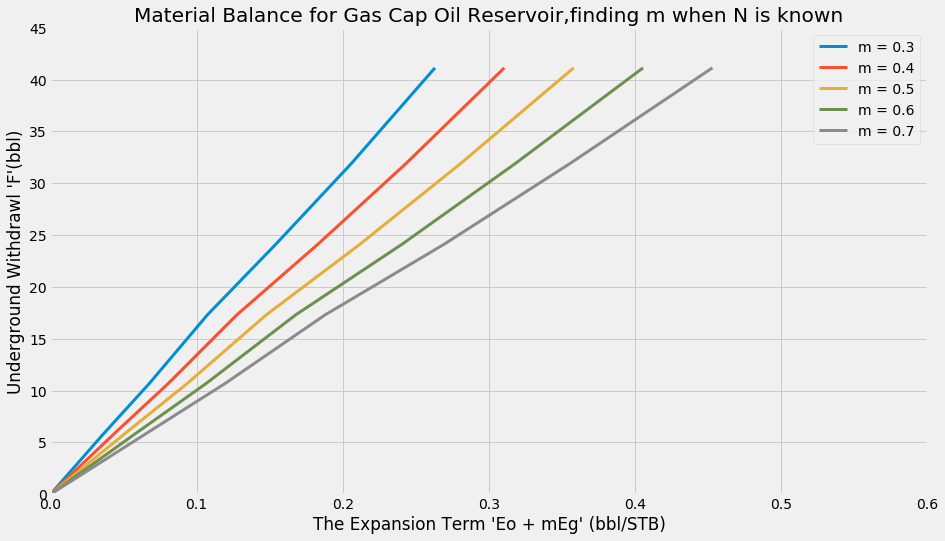

In [ ]:
plt.figure(figsize = (14,8))
plt.style.use('fivethirtyeight')

plt.xlim(0,0.6)
plt.ylim(0,45)
    
plt.xlabel("The Expansion Term 'Eo + mEg' (bbl/STB)")
plt.ylabel("Underground Withdrawl 'F'(bbl)")
plt.title("Material Balance for Gas Cap Oil Reservoir,finding m when N is known")

for i in M:
    plt.plot(dff["Eo+M{}Eg".format(i)],dff["F(MM rb)"],label = "m = {}".format(i) ,lw = 3)
    plt.legend(loc='best')
    xx = dff["Eo+M{}Eg".format(i)]
    yy = dff["F(MM rb)"]
    Model = np.polyfit(xx, yy, 1)
    print("The Oil Initially in place is", Model[0],"MMSTB for m = ", i )
    

## When intial oil in place is not known


In [ ]:
dff["F/Eo(stb)"] = dff["F(MM rb)"]/dff["Eo(rb/stb)"]
dff["Eg/Eo"] = dff["Eg(rb/stb)"]/dff["Eo(rb/stb)"]
bdf = dff[["Reservoir Pressure(psia)","F/Eo(stb)","Eg/Eo"]]
bdf

,Reservoir Pressure(psia),F/Eo(stb),Eg/Eo
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439
6,2400,340.762668,3.931692


In [ ]:
bdf

,Reservoir Pressure(psia),F/Eo(stb),Eg/Eo
0,3330,NaN,NaN
1,3150,398.853413,4.938345
2,3000,371.827296,4.509552
3,2850,368.512814,4.288103
4,2700,355.735328,4.246408
5,2550,340.609959,3.992439
6,2400,340.762668,3.931692


In [ ]:
XX = bdf["Eg/Eo"][1:7]
YY = dff["F/Eo(stb)"][1:7]
MODEL = np.polyfit(XX, YY, 1)
MODEL

array([ 58.83013376, 108.70272737])

In [ ]:
XXFitted = list(XX)
XXFitted.append(0)
XXFitted

[4.938344701275751,
 4.509551844286939,
 4.288103019842596,
 4.246407727776458,
 3.992439444986536,
 3.9316915692940655,
 0]

In [ ]:
YYFitted= []
for i in XXFitted:
    a = MODEL[0]*i + MODEL[1]
    YYFitted.append(a)
YYFitted

[399.22620669354853,
 374.0002655622319,
 360.9724015995213,
 358.5194619901731,
 343.57847394324,
 340.0046682907107,
 108.70272737219952]

The equation of the Line is: F/Eo = mN(Eg/Eo)+N
The Value of intial oil in place is  108.70272737219952 MMSTB given by intercept of the line
The value of intial ratio in reservoir(m) is 0.5412020027520333 given by slope(m*N)/intercept(N) of the line


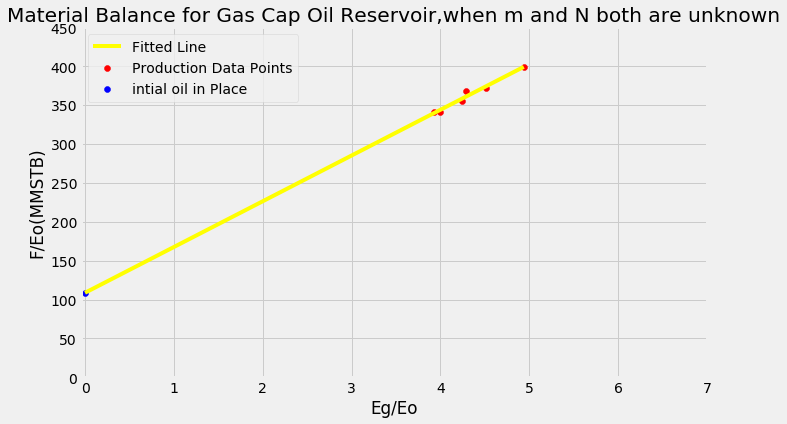

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(XXFitted,YYFitted, label = "Fitted Line",color = 'yellow')
plt.scatter(bdf["Eg/Eo"],bdf["F/Eo(stb)"],c = "red", label = "Production Data Points")
plt.scatter(0,MODEL[1], color = "b", label = "intial oil in Place")
plt.xlabel("Eg/Eo")
plt.ylabel('F/Eo(MMSTB)')
plt.title("Material Balance for Gas Cap Oil Reservoir,when m and N both are unknown")
plt.legend(loc='best')
plt.xlim(-0.05,7)
plt.ylim(0,450)
print("The equation of the Line is: F/Eo = mN(Eg/Eo)+N")
print("The Value of intial oil in place is ",MODEL[1], "MMSTB given by intercept of the line")
print("The value of intial ratio in reservoir(m) is",MODEL[0]/MODEL[1],"given by slope(m*N)/intercept(N) of the line" )

In [10]:
display(w)

interactive(children=(FloatSlider(value=0.400001, description='m', max=1.0, min=1e-06), Output()), _dom_classe…